# NFL Super Bowl Historical Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Data

In [2]:
sb_data = pd.read_csv('superbowl-history-1967-2020/superbowl.csv')
sb_data.head(10)

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California
5,Feb 1 2015,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona
6,Feb 2 2014,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey
7,Feb 3 2013,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,Joe Flacco,Mercedes-Benz Superdome,New Orleans,Louisiana
8,Feb 5 2012,XLVI (46),New York Giants,21,New England Patriots,17,Eli Manning,Lucas Oil Stadium,Indianapolis,Indiana
9,Feb 6 2011,XLV (45),Green Bay Packers,31,Pittsburgh Steelers,25,Aaron Rodgers,Cowboys Stadium,Arlington,Texas


In [3]:
sb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
Date          54 non-null object
SB            54 non-null object
Winner        54 non-null object
Winner Pts    54 non-null int64
Loser         54 non-null object
Loser Pts     54 non-null int64
MVP           54 non-null object
Stadium       54 non-null object
City          54 non-null object
State         54 non-null object
dtypes: int64(2), object(8)
memory usage: 4.3+ KB


This dataset includes data, including the winner and loser of each Super Bowl, the points scored for each team, the MVP of the game, and where the game took place.  Taking a quick look at the data, the first thing that I notice is that the *SB* column appears to be inconsistent.  Some have numerals followed by the numeric value in parentheses, but Super Bowl 50 is written in a different format.  Let's investigate this column further.

## Clean SB column

In [4]:
sb_data['SB']

0         LIV (54)
1        LIII (53)
2         LII (52)
3          LI (51)
4               50
5        XLIX (49)
6      XLVIII (48)
7       XLVII (47)
8        XLVI (46)
9         XLV (45)
10       XLIV (44)
11      XLIII (43)
12       XLII (42)
13        XLI (41)
14         XL (40)
15      XXXIX (39)
16    XXXVIII (38)
17     XXXVII (37)
18      XXXVI (36)
19       XXXV (35)
20      XXXIV (34)
21     XXXIII (33)
22      XXXII (32)
23       XXXI (31)
24        XXX (30)
25       XXIX (29)
26     XXVIII (28)
27      XXVII (27)
28       XXVI (26)
29        XXV (25)
30       XXIV (24)
31      XXIII (23)
32       XXII (22)
33        XXI (21)
34         XX (20)
35        XIX (19)
36      XVIII (18)
37       XVII (17)
38        XVI (16)
39         XV (15)
40        XIV (14)
41       XIII (13)
42        XII (12)
43         XI (11)
44          X (10)
45          IX (9)
46        VIII (8)
47         VII (7)
48          VI (6)
49           V (5)
50          IV (4)
51         III (3)
52          

It appears that Super Bowl 50 is the only one that differs from the basic format, but nevertheless, I don't think that the numeral is relevant for this analysis, so I just want to keep the number.

In [5]:
#Split string at the space
sb_data['SB'] = sb_data['SB'].str.split()
#Only keep last element of list created
sb_data['SB'] = sb_data['SB'].str[-1]
#Replace open and close parentheses
sb_data['SB'] = sb_data['SB'].str.replace('(','')
sb_data['SB'] = sb_data['SB'].str.replace(')','')
#Convert to an integer
sb_data['SB'] = sb_data['SB'].astype('int')

In [6]:
sb_data['SB'].head()

0    54
1    53
2    52
3    51
4    50
Name: SB, dtype: int32

## Clean Column Names

Personally when working with data, especially when needing to refer to columns by name, I prefer to use all lowercase without spaces.  So that is my next task, to rename the columns to be more efficient

In [7]:
#map for old columns names and what they will be replaced with
mapping = {
    'Date':'date', 'SB':'sb_num', 'Winner':'winner',
    'Winner Pts':'winner_pts', 'Loser':'loser', 'Loser Pts':'loser_pts',
    'MVP':'mvp', 'Stadium':'stadium', 'City':'city', 'State':'state'
}
#Rename the columns
sb_data = sb_data.rename(columns=mapping)
sb_data.head()

,date,sb_num,winner,winner_pts,loser,loser_pts,mvp,stadium,city,state
0,Feb 2 2020,54,Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,53,New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,52,Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,51,New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


Now that that is done, I can begin some analysis.  The first thing that I am curious about is how many Super Bowls each team has won, and who has won the most.

In [8]:
#Count of different teams that have won the Super Bowl
sb_data['winner'].value_counts().count()

22

In [9]:
#Count how many each times a team name appears in the winner column
sb_data['winner'].value_counts().sort_values(ascending=False)

Pittsburgh Steelers     6
New England Patriots    6
San Francisco 49ers     5
Dallas Cowboys          5
New York Giants         4
Green Bay Packers       4
Washington Redskins     3
Denver Broncos          3
Oakland Raiders         2
Baltimore Ravens        2
Kansas City Chiefs      2
Miami Dolphins          2
Baltimore Colts         1
Philadelphia Eagles     1
St. Louis Rams          1
Seattle Seahawks        1
Los Angeles Raiders     1
Tampa Bay Buccaneers    1
New York Jets           1
New Orleans Saints      1
Chicago Bears           1
Indianapolis Colts      1
Name: winner, dtype: int64

<BarContainer object of 22 artists>

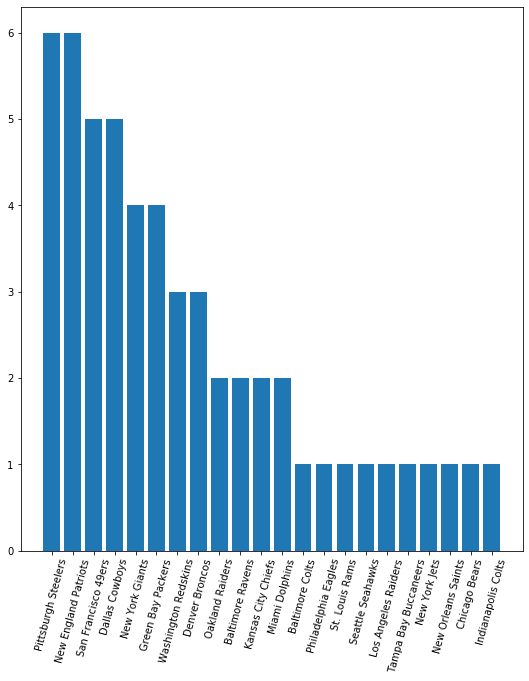

In [10]:
plt.figure(figsize = (9,10))
plt.xticks(rotation=75)
plt.bar(x=sb_data['winner'].value_counts().sort_values(ascending=False).index, 
        height=sb_data['winner'].value_counts().values)

A total of 22 different teams have won the Super Bowl. Note that this is a count of different teams, but not necessarily different *franchises*. For instance, the Baltimore Colts won the Super Bowl but later relocated and became the Indianapolis Colts, who then went on to win a Super Bowl of their own. These teams might be a part of the same franchise, but are categorized as different teams for the purpose of this analysis.

Both the New England Patriots and the Pittsburgh Steelers have won a record six Super Bowls. If you are familiar with the NFL, you probably know all about the Patriots dominance in the league since Tom Brady became their quarterback in 2000.

In [11]:
#Convert date to datetime object so it can be used for comparison
sb_data['date'] = pd.to_datetime(sb_data['date'])

In [12]:
sb_data['date'].head()

0   2020-02-02
1   2019-02-03
2   2018-02-04
3   2017-02-05
4   2016-02-07
Name: date, dtype: datetime64[ns]

In [13]:
# Tom Brady debut Nov, 23, 2000
brady_debut = pd.to_datetime('Nov 23 2000')
brady_debut

Timestamp('2000-11-23 00:00:00')

In [14]:
#Isolate Super Bowls won by the Patriots after the date of Tom Brady's debut
sb_data[(sb_data['date'] > brady_debut) & (sb_data['winner'] == 'New England Patriots')]

,date,sb_num,winner,winner_pts,loser,loser_pts,mvp,stadium,city,state
1,2019-02-03,53,New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
3,2017-02-05,51,New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
5,2015-02-01,49,New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona
15,2005-02-06,39,New England Patriots,24,Philadelphia Eagles,21,Deion Branch,Alltel Stadium,Jacksonville,Florida
16,2004-02-01,38,New England Patriots,32,Carolina Panthers,29,Tom Brady,Reliant Stadium,Houston,Texas
18,2002-02-03,36,New England Patriots,20,St. Louis Rams,17,Tom Brady,Louisiana Superdome,New Orleans,Louisiana


As you can see, the Patriots have won all six of their Super Bowls since Tom Brady took over as their quarterback in 2000.  And as you can see from the data in the *mvp* column, he has won the Super Bowl MVP award in four of those six Super Bowl wins.

In [15]:
sb_data[sb_data['winner'] == 'Pittsburgh Steelers']

,date,sb_num,winner,winner_pts,loser,loser_pts,mvp,stadium,city,state
11,2009-02-01,43,Pittsburgh Steelers,27,Arizona Cardinals,23,Santonio Holmes,Raymond James Stadium,Tampa,Florida
14,2006-02-05,40,Pittsburgh Steelers,21,Seattle Seahawks,10,Hines Ward,Ford Field,Detroit,Michigan
40,1980-01-20,14,Pittsburgh Steelers,31,Los Angeles Rams,19,Terry Bradshaw+,Rose Bowl,Pasadena,California
41,1979-01-21,13,Pittsburgh Steelers,35,Dallas Cowboys,31,Terry Bradshaw+,Orange Bowl,Miami,Florida
44,1976-01-18,10,Pittsburgh Steelers,21,Dallas Cowboys,17,Lynn Swann+,Orange Bowl,Miami,Florida
45,1975-01-12,9,Pittsburgh Steelers,16,Minnesota Vikings,6,Franco Harris+,Tulane Stadium,New Orleans,Louisiana


In [16]:
sb_data['mvp'] = sb_data['mvp'].str.replace('+','')

The Pittsburgh Steelers have also won six Super Bowls, but the majority of their Super Bowl wins came between 1975 and 1980.  Only two have occurred in the past 20 years however.

## Patriots Dynasty Under Tom Brady

As I showed a little earlier, the Patriots have won all six of their Super Bowls since Tom Brady became their quarterback. As the Steelers fan, it brings me no joy to say this, but the Patriots have been the team to beat every year since Brady took the helm.  So now I want to focus on the NFL after Tom Brady joined the league.

In [17]:
sb_data[(sb_data['date'] > brady_debut) & 
        ((sb_data['winner'] == 'New England Patriots') | (sb_data['loser'] == 'New England Patriots'))]

,date,sb_num,winner,winner_pts,loser,loser_pts,mvp,stadium,city,state
1,2019-02-03,53,New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,2018-02-04,52,Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,2017-02-05,51,New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
5,2015-02-01,49,New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona
8,2012-02-05,46,New York Giants,21,New England Patriots,17,Eli Manning,Lucas Oil Stadium,Indianapolis,Indiana
12,2008-02-03,42,New York Giants,17,New England Patriots,14,Eli Manning,University of Phoenix Stadium,Glendale,Arizona
15,2005-02-06,39,New England Patriots,24,Philadelphia Eagles,21,Deion Branch,Alltel Stadium,Jacksonville,Florida
16,2004-02-01,38,New England Patriots,32,Carolina Panthers,29,Tom Brady,Reliant Stadium,Houston,Texas
18,2002-02-03,36,New England Patriots,20,St. Louis Rams,17,Tom Brady,Louisiana Superdome,New Orleans,Louisiana


In [18]:
sb_data[(sb_data['date'] > brady_debut)][['winner','loser']]

,winner,loser
0,Kansas City Chiefs,San Francisco 49ers
1,New England Patriots,Los Angeles Rams
2,Philadelphia Eagles,New England Patriots
3,New England Patriots,Atlanta Falcons
4,Denver Broncos,Carolina Panthers
5,New England Patriots,Seattle Seahawks
6,Seattle Seahawks,Denver Broncos
7,Baltimore Ravens,San Francisco 49ers
8,New York Giants,New England Patriots
9,Green Bay Packers,Pittsburgh Steelers


In [19]:
super_bowl_apps_2001 = {}
for x in sb_data[(sb_data['date'] > brady_debut)]['winner']:
    if x in super_bowl_apps_2001:
        super_bowl_apps_2001[x] += 1
    else: 
        super_bowl_apps_2001[x] = 1
for x in sb_data[(sb_data['date'] > brady_debut)]['loser']:
    if x in super_bowl_apps_2001:
        super_bowl_apps_2001[x] += 1
    else: 
        super_bowl_apps_2001[x] = 1
sorted(super_bowl_apps_2001.items(), key = lambda apps: apps[1], reverse=True)

[('New England Patriots', 9),
 ('Seattle Seahawks', 3),
 ('New York Giants', 3),
 ('Pittsburgh Steelers', 3),
 ('Philadelphia Eagles', 2),
 ('Denver Broncos', 2),
 ('Baltimore Ravens', 2),
 ('Indianapolis Colts', 2),
 ('San Francisco 49ers', 2),
 ('Carolina Panthers', 2),
 ('Kansas City Chiefs', 1),
 ('Green Bay Packers', 1),
 ('New Orleans Saints', 1),
 ('Tampa Bay Buccaneers', 1),
 ('Los Angeles Rams', 1),
 ('Atlanta Falcons', 1),
 ('Arizona Cardinals', 1),
 ('Chicago Bears', 1),
 ('Oakland Raiders', 1),
 ('St. Louis Rams', 1)]

Since 2001, the Patriots have appeared in the Super Bowl three times as often as the next closest teams. Once again, as a Steelers fan it pains me to say it, but the data doesn't lie, the Patriots have been a dominant force in the NFL with Tom Brady as their quarterback.

## Super Bowls by Location

The Super Bowl is usually played during the month of February.  Because of this, the Super Bowl is most often held in either a warm climate, or in a stadium that has a dome (indoors, climate controlled) so that weather does not have a big impact on the game.

Let's take a look at the most common states and cities for the Super Bowl to be played in.

In [20]:
sb_data['state'].value_counts()

Florida       16
California    12
Louisiana     10
Texas          4
Arizona        3
Georgia        3
Minnesota      2
Michigan       2
New Jersey     1
Indiana        1
Name: state, dtype: int64

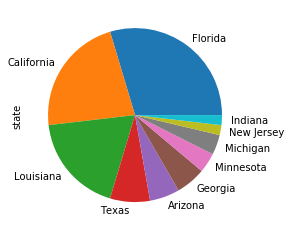

In [21]:
sb_data['state'].value_counts().plot(kind='pie')

In [22]:
sb_data['city'].value_counts()

New Orleans        10
Miami Gardens       6
Pasadena            5
Miami               5
Tampa               4
Atlanta             3
Houston             3
San Diego           3
Los Angeles         2
Minneapolis         2
Glendale            2
Palo Alto           1
Pontiac             1
Tempe               1
East Rutherford     1
Indianapolis        1
Detroit             1
Jacksonville        1
Santa Clara         1
Arlington           1
Name: city, dtype: int64

Most Super Bowls have been played in either Florida, California, or Louisiana.  This aligns with what I said earlier about the game mostly being played in a warmer climate. I find it interesting that New Orleans has hosted the Super Bowl 10 different times, which accounts for almost 20% of all Super Bowls played.  It is also interesting to note that there is an NFL team in New Orleans.  Let's find out if they have ever played a Super Bowl in their hometown.

In [23]:
sb_data[(sb_data['city'] == 'New Orleans') & ((sb_data['winner'] == 'New Orleans Saints') |
                                              (sb_data['loser'] == 'New Orleans Saints'))]

,date,sb_num,winner,winner_pts,loser,loser_pts,mvp,stadium,city,state


Looks like they haven't.  But this leads me to wonder if any NFL team has played a Super Bowl in their home city.  Let's try to investigate.

In [24]:
sb_city_split = sb_data.copy()

In [25]:
sb_city_split['winner'] = sb_city_split['winner'].str.split()
sb_city_split['win_team'] = sb_city_split['winner'].str[-1]
sb_city_split['win_city'] = sb_city_split['winner'].str[:-1]
sb_city_split['win_city'] = sb_city_split['win_city'].str.join(sep = ' ')

In [26]:
sb_city_split['loser'] = sb_city_split['loser'].str.split()
sb_city_split['lose_team'] = sb_city_split['loser'].str[-1]
sb_city_split['lose_city'] = sb_city_split['loser'].str[:-1]
sb_city_split['lose_city'] = sb_city_split['lose_city'].str.join(sep = ' ')

In [27]:
sb_city_split.head()

,date,sb_num,winner,winner_pts,loser,loser_pts,mvp,stadium,city,state,win_team,win_city,lose_team,lose_city
0,2020-02-02,54,"[Kansas, City, Chiefs]",31,"[San, Francisco, 49ers]",20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida,Chiefs,Kansas City,49ers,San Francisco
1,2019-02-03,53,"[New, England, Patriots]",13,"[Los, Angeles, Rams]",3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia,Patriots,New England,Rams,Los Angeles
2,2018-02-04,52,"[Philadelphia, Eagles]",41,"[New, England, Patriots]",33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota,Eagles,Philadelphia,Patriots,New England
3,2017-02-05,51,"[New, England, Patriots]",34,"[Atlanta, Falcons]",28,Tom Brady,NRG Stadium,Houston,Texas,Patriots,New England,Falcons,Atlanta
4,2016-02-07,50,"[Denver, Broncos]",24,"[Carolina, Panthers]",10,Von Miller,Levi's Stadium,Santa Clara,California,Broncos,Denver,Panthers,Carolina


In [28]:
sb_city_split[(sb_city_split['win_city'] == sb_city_split['city']) | 
             (sb_city_split['lose_city'] == sb_city_split['city'])]

,date,sb_num,winner,winner_pts,loser,loser_pts,mvp,stadium,city,state,win_team,win_city,lose_team,lose_city


No NFL teams have played in a Super Bowl in their home city.

The 2021 Super Bowl (Super Bowl 55) will be held in Tampa, Florida, the 17th time it has been held in Florida.  Let's take a look at who has won the most Super Bowls in the state of Florida.

In [29]:
sb_data[sb_data['state'] == 'Florida']['winner'].value_counts().head()

Pittsburgh Steelers    3
San Francisco 49ers    2
Green Bay Packers      1
Baltimore Colts        1
Kansas City Chiefs     1
Name: winner, dtype: int64

In [30]:
sb_data[sb_data['city'] == 'Tampa']['winner'].value_counts().head()

Los Angeles Raiders    1
Pittsburgh Steelers    1
New York Giants        1
Baltimore Ravens       1
Name: winner, dtype: int64

## Biggest Losers

Up until this point, I have focused on the winners of the Super Bowl, but now I want to take a look at different metrics revolving around the losing team of each Super Bowl.

The first thing I want to take a look at are teams that have never won a Super Bowl or have never won a Super Bowl. But our current dataset only includes the nfl teams that have played in a Super Bowl, so I need to import another one that includes all NFL teams.

In [57]:
teams = pd.read_csv('nfl_teams/nfl_teams.csv', index_col = 'ID')
teams['Name'] = teams['Name'].str.replace('NY', 'New York')
teams

,Name,Abbreviation,Conference,Division
ID,,,,
1,Arizona Cardinals,ARI,NFC,West
2,Atlanta Falcons,ATL,NFC,South
3,Baltimore Ravens,BAL,AFC,North
4,Buffalo Bills,BUF,AFC,East
5,Carolina Panthers,CAR,NFC,South
6,Chicago Bears,CHI,NFC,North
7,Cincinnati Bengals,CIN,AFC,North
8,Cleveland Browns,CLE,AFC,North
9,Dallas Cowboys,DAL,NFC,East


In [67]:
team_list = teams['Name'].to_list()
winner_list = sb_data['winner'].to_list()
loser_list = sb_data['loser'].to_list()

In [66]:
have_not_won = []
for x in team_list:
    if x in winner_list:
        pass
    else:
        have_not_won.append(x)
have_not_won

['Arizona Cardinals',
 'Atlanta Falcons',
 'Buffalo Bills',
 'Carolina Panthers',
 'Cincinnati Bengals',
 'Cleveland Browns',
 'Detroit Lions',
 'Houston Texans',
 'Jacksonville Jaguars',
 'Minnesota Vikings',
 'San Diego Chargers',
 'Tennessee Titans']

These 12 teams have never won a Super Bowl.  This is an interesting statistic because the Patriots and Steelers have combined for 12 Super Bowls.

In [109]:
sb_data[sb_data['loser'].isin(have_not_won)]['loser'].value_counts()

Buffalo Bills         4
Minnesota Vikings     4
Carolina Panthers     2
Atlanta Falcons       2
Cincinnati Bengals    2
San Diego Chargers    1
Arizona Cardinals     1
Tennessee Titans      1
Name: loser, dtype: int64

The Bills and Vikings have lost four Super Bowls each but have never won one.  And if you take a look at the table below, the Bills actually lost four Super Bowls in a row!

In [110]:
sb_data[sb_data['loser'] == 'Buffalo Bills']

,date,sb_num,winner,winner_pts,loser,loser_pts,mvp,stadium,city,state,diff
26,1994-01-30,28,Dallas Cowboys,30,Buffalo Bills,13,Emmitt Smith,Georgia Dome,Atlanta,Georgia,17
27,1993-01-31,27,Dallas Cowboys,52,Buffalo Bills,17,Troy Aikman,Rose Bowl,Pasadena,California,35
28,1992-01-26,26,Washington Redskins,37,Buffalo Bills,24,Mark Rypien,Metrodome,Minneapolis,Minnesota,13
29,1991-01-27,25,New York Giants,20,Buffalo Bills,19,Ottis Anderson,Tampa Stadium,Tampa,Florida,1


In [69]:
have_not_appeared = []
for x in team_list:
    if x in loser_list:
        pass
    elif x in winner_list:
        pass
    else:
        have_not_appeared.append(x)
have_not_appeared

['Cleveland Browns', 'Detroit Lions', 'Houston Texans', 'Jacksonville Jaguars']

These four teams have never appeared in the Super Bowl.  With more data, further analysis could be done on just how close each of these have gotten, but for the purposes of this project, all we need to know is that they have never made it there.

## Least Points Scored

In [72]:
sb_data.sort_values(by='loser_pts')[['sb_num', 'loser', 'loser_pts']].head()

,sb_num,loser,loser_pts
1,53,Los Angeles Rams,3
48,6,Miami Dolphins,3
45,9,Minnesota Vikings,6
46,8,Minnesota Vikings,7
47,7,Washington Redskins,7


In [82]:
sb_data.groupby(['loser']).mean().sort_values(by='loser_pts').head()

,sb_num,winner_pts,loser_pts
loser,,,
New York Giants,35.0,34.00,7.0
Baltimore Colts,3.0,16.00,7.0
Washington Redskins,12.5,26.00,8.0
Minnesota Vikings,8.0,23.75,8.5
Kansas City Chiefs,1.0,35.00,10.0


In [83]:
sb_data['diff'] = sb_data['winner_pts'] - sb_data['loser_pts']

In [86]:
sb_data.sort_values(by='diff', ascending=False).head()

,date,sb_num,winner,winner_pts,loser,loser_pts,mvp,stadium,city,state,diff
30,1990-01-28,24,San Francisco 49ers,55,Denver Broncos,10,Joe Montana,Louisiana Superdome,New Orleans,Louisiana,45
34,1986-01-26,20,Chicago Bears,46,New England Patriots,10,Richard Dent,Louisiana Superdome,New Orleans,Louisiana,36
27,1993-01-31,27,Dallas Cowboys,52,Buffalo Bills,17,Troy Aikman,Rose Bowl,Pasadena,California,35
6,2014-02-02,48,Seattle Seahawks,43,Denver Broncos,8,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey,35
32,1988-01-31,22,Washington Redskins,42,Denver Broncos,10,Doug Williams,Jack Murphy Stadium,San Diego,California,32


In [96]:
sb_data['loser'].value_counts().sort_values(ascending=False)

New England Patriots    5
Denver Broncos          5
Minnesota Vikings       4
Buffalo Bills           4
Dallas Cowboys          3
Miami Dolphins          3
Cincinnati Bengals      2
Washington Redskins     2
Oakland Raiders         2
Seattle Seahawks        2
Pittsburgh Steelers     2
Philadelphia Eagles     2
Los Angeles Rams        2
San Francisco 49ers     2
Carolina Panthers       2
Atlanta Falcons         2
Kansas City Chiefs      1
St. Louis Rams          1
San Diego Chargers      1
Arizona Cardinals       1
New York Giants         1
Chicago Bears           1
Baltimore Colts         1
Tennessee Titans        1
Green Bay Packers       1
Indianapolis Colts      1
Name: loser, dtype: int64